# Exploração dos dados das criptomoedas

- Fonte dos dados: API yfinance
- Data: 25/09/2023

## Instalando as bibliotecas necessárias



In [ ]:
!pip install matplotlib

In [ ]:
!pip install Historic-Crypto

In [ ]:
!pip install yfinance

In [119]:
!pip install talib

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install statsmodels

In [ ]:
!pip install tensorflow scikit-learn imblearn

## Importando as bibliotecas

In [ ]:
import yfinance as yf
import talib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation

Justificativa da escolha das moedas analisadas: porque quis e porque são as mais famosas e com maior volume de negociação.

### Importando dados do bitcoin

In [36]:
btc_data = yf.download('BTC-USD', period="1y")


[*********************100%***********************]  1 of 1 completed


### importando dados da Solana


In [94]:
sol_data = yf.download('SOL-USD', period='1y')

[*********************100%***********************]  1 of 1 completed


Analisando os dados do bitcoin

In [39]:
print('Tipo dos dados:', type(btc_data))
print('Dimensões dos dados:', btc_data.shape)
print('Colunas dos dados:', btc_data.columns)
print('Informações dos dados:', btc_data.info())

Tipo dos dados: <class 'pandas.core.frame.DataFrame'>
Dimensões dos dados: (367, 6)
Colunas dos dados: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2023-09-28 to 2024-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       367 non-null    float64
 1   High       367 non-null    float64
 2   Low        367 non-null    float64
 3   Close      367 non-null    float64
 4   Adj Close  367 non-null    float64
 5   Volume     367 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.1 KB
Informações dos dados: None


Analisando os dados da Solana

In [5]:
print('Tipo dos dados:', type(sol_data))
print('Dimensões dos dados:', sol_data.shape)
print('Colunas dos dados:', sol_data.columns)
print('Informações dos dados:', sol_data.info())

Tipo dos dados: <class 'pandas.core.frame.DataFrame'>
Dimensões dos dados: (64, 7)
Colunas dos dados: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2024-06-25 00:00:00-04:00 to 2024-09-24 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          64 non-null     float64
 1   High          64 non-null     float64
 2   Low           64 non-null     float64
 3   Close         64 non-null     float64
 4   Volume        64 non-null     int64  
 5   Dividends     64 non-null     float64
 6   Stock Splits  64 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.0 KB
Informações dos dados: None


In [52]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-28,26355.812500,27259.500000,26327.322266,27021.546875,27021.546875,14079002707
2023-09-29,27024.841797,27225.937500,26721.763672,26911.720703,26911.720703,10396435377
2023-09-30,26911.689453,27091.794922,26888.968750,26967.916016,26967.916016,5331172801
2023-10-01,26967.396484,28047.238281,26965.093750,27983.750000,27983.750000,9503917434
2023-10-02,27976.798828,28494.458984,27347.787109,27530.785156,27530.785156,19793041322


In [96]:
sol_data.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-28,19.129475,19.960865,19.110308,19.957617,19.957617,225954938
2023-09-29,19.959581,20.415977,19.875160,20.300655,20.300655,219571069
2023-09-30,20.299589,21.729971,20.124680,21.395147,21.395147,328987954
2023-10-01,21.392059,24.396019,21.170073,23.836487,23.836487,637123111
2023-10-02,23.837955,24.603424,22.976023,23.371700,23.371700,658084028
2023-10-03,23.369921,24.662073,23.296711,23.552694,23.552694,653491878
2023-10-04,23.556915,23.754377,22.692842,23.144787,23.144787,429268875
2023-10-05,23.146551,23.717648,22.628948,22.694141,22.694141,361288781
2023-10-06,22.692167,23.705091,22.692167,23.424454,23.424454,402665506


Analisando tendencias sazonalidade

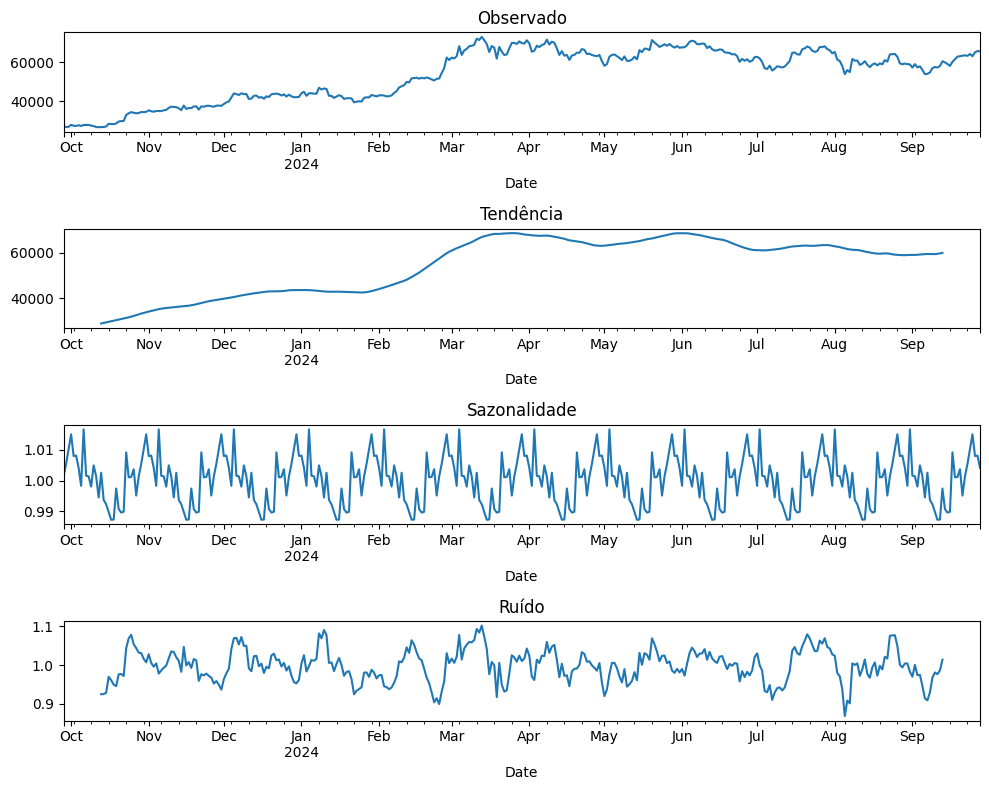

In [42]:
decomposition_btc = seasonal_decompose(btc_data['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_btc.observed.plot(ax=axes[0], title='Observado')
decomposition_btc.trend.plot(ax=axes[1], title='Tendência')
decomposition_btc.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition_btc.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()

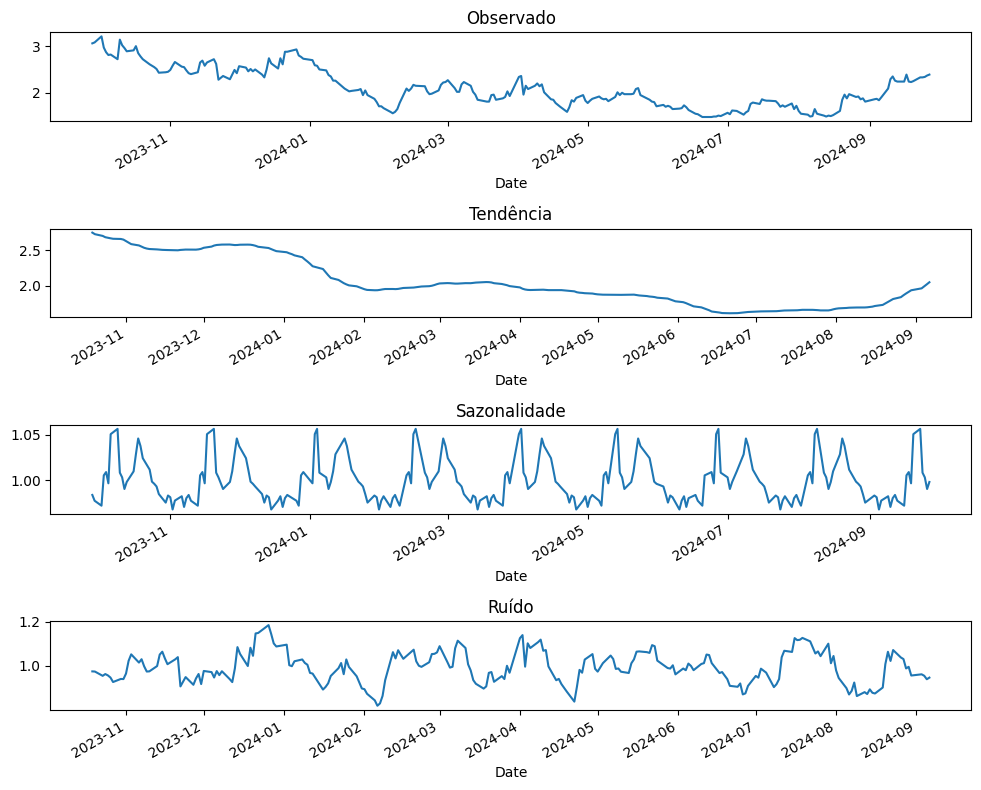

In [41]:


# Decompondo a série temporal
decomposition_sol = seasonal_decompose(sol_data['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition_sol.observed.plot(ax=axes[0], title='Observado')
decomposition_sol.trend.plot(ax=axes[1], title='Tendência')
decomposition_sol.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition_sol.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()

testando se a série é estacionária

In [43]:
from statsmodels.tsa.stattools import adfuller

# Teste de Dickey-Fuller
result = adfuller(sol_data['Close'])
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -2.5525571509790677
Valor-p: 0.10320443943096885
Valores críticos: {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}


<Axes: title={'center': 'Diferença dos Dados'}, xlabel='Date'>

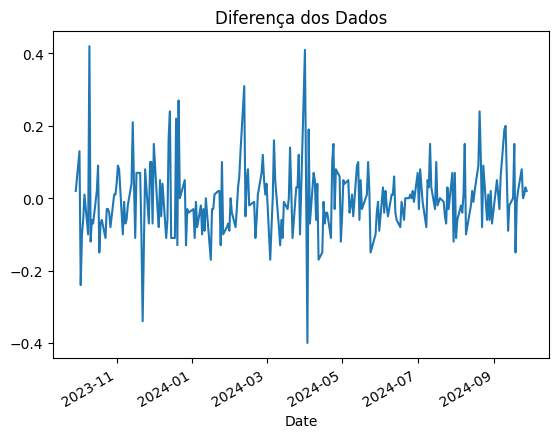

In [45]:
sol_data['Close_diff'] = sol_data['Close'].diff()
sol_data['Close_diff'].plot(title='Diferença dos Dados')

In [48]:
result = adfuller(sol_data['Close_diff'].dropna())
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -16.459852759170605
Valor-p: 2.3357023202718864e-29
Valores críticos: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


In [49]:
sol_data.head()

,Open,High,Low,Close,Adj Close,Volume,Close_diff
Date,,,,,,,
2023-09-28,3.04,3.09,2.99,3.06,3.06,2112700,NaN
2023-09-29,3.10,3.16,3.05,3.08,3.08,385200,0.02
2023-10-02,3.09,3.27,3.07,3.21,3.21,570900,0.13
2023-10-03,3.10,3.13,2.95,2.97,2.97,454300,-0.24
2023-10-04,2.95,2.97,2.87,2.87,2.87,427700,-0.10


## Pré processando dados

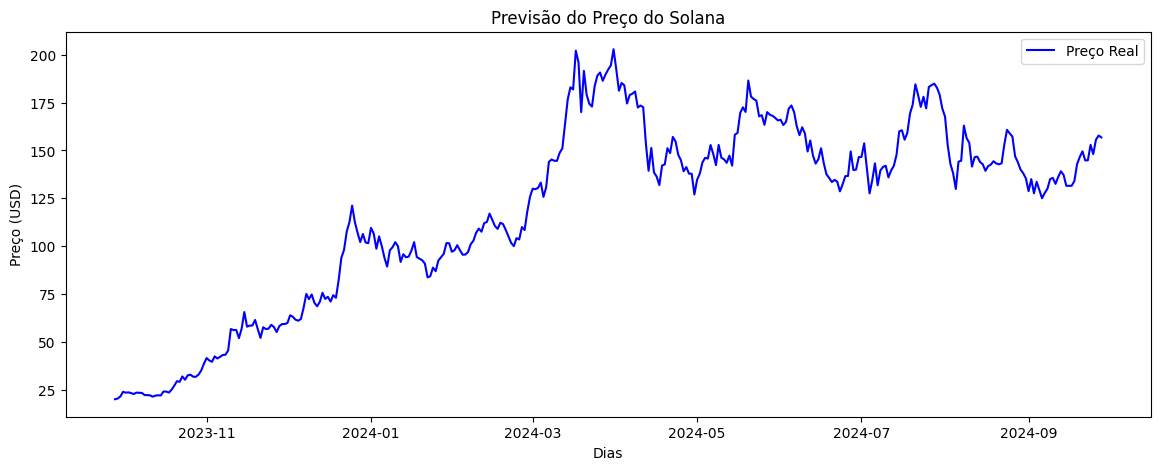

In [111]:
plt.figure(figsize=(14,5))
plt.plot(sol_data["Close"], color='blue', label='Preço Real')
# plt.plot(predicted_prices, color='red', label='Preço Previsto')
plt.title('Previsão do Preço do Solana')
plt.xlabel('Dias')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

-------------------------------------------------------------------------

In [192]:
scaler = MinMaxScaler()

sol_reshaped = sol.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(sol_reshaped)

In [164]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [193]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.80)

In [194]:
model = keras.Sequential()

model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Inteli\Inteli 2024\M7\m7-activities\venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [195]:
BATCH_SIZE = 64

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0057 - val_loss: 0.0038
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 0.0049 - val_loss: 0.0034
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 

In [196]:
y_predict = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step


In [197]:
y_test = y_test.reshape(-1, 1)  # Reshape para [n_amostras, 1]
y_predict = y_predict.reshape(-1, 1)  # Reshape para [n_amostras, 1]

In [198]:
Y_real = scaler.inverse_transform(y_test)
y_predicted = scaler.inverse_transform(y_predict)

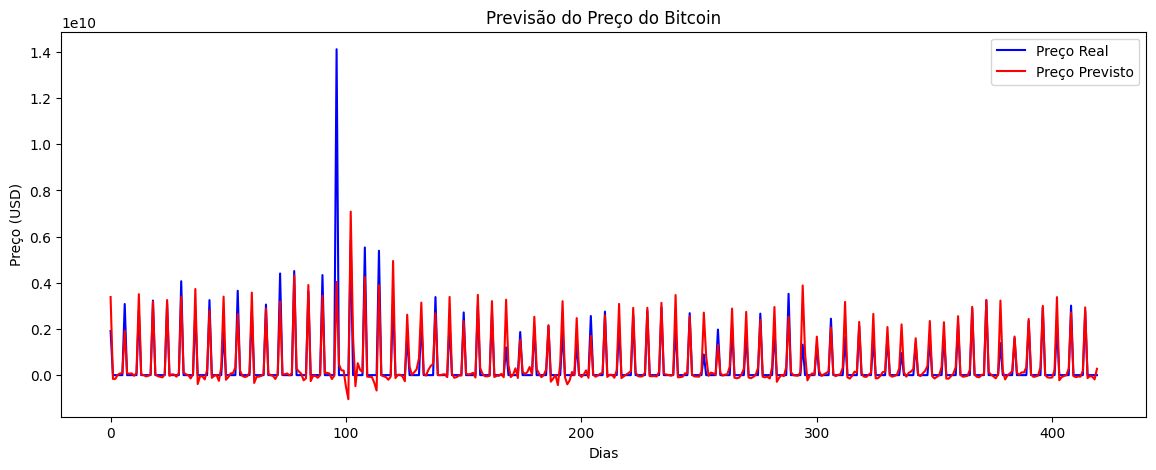

In [199]:
plt.figure(figsize=(14,5))
plt.plot(Y_real, color='blue', label='Preço Real')
plt.plot(y_predicted, color='red', label='Preço Previsto')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Dias')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

### prever para os próximos 30 dias

In [180]:
# Obtendo os últimos 30 dias de dados
last_30_days = sol[-30:].values.reshape(-1, 1)

# Normalizando os dados
last_30_days_scaled = scaler.transform(last_30_days)

In [181]:
# Criando a sequência para previsão
X_input = last_30_days_scaled.reshape(1, -1, 1)  # Reshape para [amostras, tempo, características]

In [182]:
predicted_prices = []

for _ in range(30):
    # Fazendo a previsão
    predicted_price = model.predict(X_input)
    
    # Invertendo a normalização
    predicted_price_inverted = scaler.inverse_transform(predicted_price)
    print(predicted_price_inverted)
    predicted_prices.append(predicted_price_inverted[0][0])
    
    # Atualizando a sequência de entrada
    X_input = np.append(X_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[-2.1388074e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[-1.14287576e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[1.9292571e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[1.5709397e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[86798984.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[1.4303098e+09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[-32768180.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[21133104.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[1.9729869e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[61401444.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[1.5995878e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[1.8983402e+09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[-42057496.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[-17180016.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[1.6461992e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[30226140.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[2.4936098e+08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[1.9324494e+09]]
1/1 ━━━━

In [183]:
# Criando um array com as datas futuras
last_date = sol.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Criando um DataFrame para as previsões
predicted_prices_df = pd.DataFrame(data=predicted_prices, index=future_dates, columns=['Preço Previsto'])

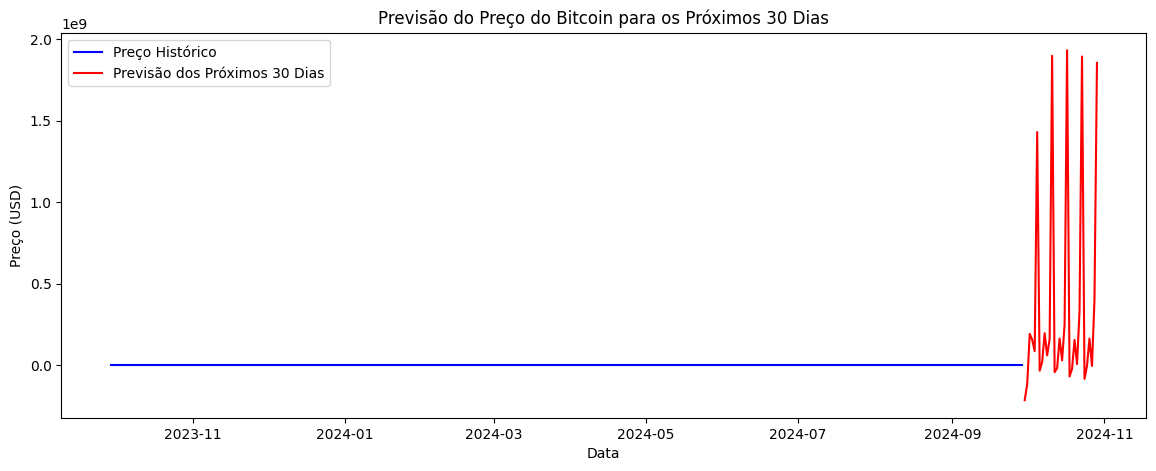

In [184]:
plt.figure(figsize=(14,5))
plt.plot(sol['Close'], color='blue', label='Preço Histórico')
plt.plot(predicted_prices_df, color='red', label='Previsão dos Próximos 30 Dias')
plt.title('Previsão do Preço do Bitcoin para os Próximos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

In [176]:
sol.Close

Date
2023-09-29     20.300655
2023-09-30     21.395147
2023-10-01     23.836487
2023-10-02     23.371700
2023-10-03     23.552694
                 ...    
2024-09-24    152.892151
2024-09-25    148.023422
2024-09-26    155.576096
2024-09-27    157.749939
2024-09-29    157.042358
Name: Close, Length: 366, dtype: float64